In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from utils import (get_dates, 
                   get_files, 
                   extract_mta_data,
                   resample_counts,
                   get_entries_exits,
                  )

In [2]:
start_date = "220108"
weeks = 1

In [3]:
%%time
df = extract_mta_data(start_date, weeks=1)
df.shape

/Users/twitter/Desktop/Current Research/nyc_subway/v2/utils.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_)


CPU times: user 696 ms, sys: 165 ms, total: 861 ms
Wall time: 3.09 s


(209629, 11)

In [ ]:
df['DATE'].max()

In [ ]:
df.head()

In [293]:
df_ent, df_ex = get_entries_exits(df)

/Users/twitter/Desktop/Current Research/nyc_subway/v2/utils.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  'C/A']].groupby(['STATION','UNIT','SCP','C/A']).diff()#.abs()
/Users/twitter/Desktop/Current Research/nyc_subway/v2/utils.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ex'] = df[['EXITS',


In [294]:
df_ent.head()

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITEHALL S-FRY,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV
TIME,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,NaN,48.75,NaN,NaN,NaN,0.0,48.5,9.5,NaN,0.0,...,27.25,NaN,NaN,9.25,0.0,NaN,NaN,20.5,208.0,1.0
2022-01-01 01:00:00,NaN,48.75,NaN,NaN,NaN,0.0,48.5,9.5,NaN,0.0,...,27.25,NaN,NaN,9.25,0.0,NaN,NaN,20.5,208.0,1.0
2022-01-01 02:00:00,NaN,48.75,NaN,NaN,NaN,0.0,48.5,9.5,NaN,0.0,...,27.25,NaN,NaN,9.25,0.0,NaN,NaN,20.5,208.0,1.0
2022-01-01 03:00:00,34.75,48.75,105.0,21.75,24.75,0.0,48.5,9.5,8.5,0.0,...,27.25,7.5,13.5,9.25,0.0,16.75,18.0,20.5,208.0,1.0
2022-01-01 04:00:00,34.75,48.75,105.0,21.75,24.75,7.0,48.5,9.5,8.5,276.0,...,27.25,7.5,13.5,9.25,54.0,16.75,18.0,20.5,208.0,1.0


In [295]:
df_ex.head()

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITEHALL S-FRY,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV
TIME,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,NaN,247.0,NaN,NaN,NaN,0.0,186.5,45.0,NaN,0.0,...,94.25,NaN,NaN,6.5,0.0,NaN,NaN,95.25,49.25,22.5
2022-01-01 01:00:00,NaN,247.0,NaN,NaN,NaN,0.0,186.5,45.0,NaN,0.0,...,94.25,NaN,NaN,6.5,0.0,NaN,NaN,95.25,49.25,22.5
2022-01-01 02:00:00,NaN,247.0,NaN,NaN,NaN,0.0,186.5,45.0,NaN,0.0,...,94.25,NaN,NaN,6.5,0.0,NaN,NaN,95.25,49.25,22.5
2022-01-01 03:00:00,144.5,247.0,89.0,8.25,55.5,0.0,186.5,45.0,8.25,0.0,...,94.25,12.25,34.0,6.5,0.0,10.25,44.75,95.25,49.25,22.5
2022-01-01 04:00:00,144.5,247.0,89.0,8.25,55.5,10.0,186.5,45.0,8.25,895.0,...,94.25,12.25,34.0,6.5,307.0,10.25,44.75,95.25,49.25,22.5


In [296]:
df_ent.columns = [x+"_ent" for x in df_ent.columns]

In [297]:
df_ex.columns = [x+"_ex" for x in df_ex.columns]

In [298]:
df_out = pd.concat([df_ent,df_ex], axis=1)\
           .reindex(sorted(df.columns), axis=1)

In [299]:
df_out[sorted(df_out.columns)]

,1 AV_ent,1 AV_ex,103 ST-CORONA_ent,103 ST-CORONA_ex,103 ST_ent,103 ST_ex,104 ST_ent,104 ST_ex,110 ST_ent,110 ST_ex,...,WOODLAWN_ent,WOODLAWN_ex,WORLD TRADE CTR_ent,WORLD TRADE CTR_ex,WTC-CORTLANDT_ent,WTC-CORTLANDT_ex,YORK ST_ent,YORK ST_ex,ZEREGA AV_ent,ZEREGA AV_ex
TIME,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,NaN,NaN,NaN,NaN,48.75,247.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.5,95.25,208.0,49.25,1.0,22.5
2022-01-01 01:00:00,NaN,NaN,NaN,NaN,48.75,247.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.5,95.25,208.0,49.25,1.0,22.5
2022-01-01 02:00:00,NaN,NaN,NaN,NaN,48.75,247.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.5,95.25,208.0,49.25,1.0,22.5
2022-01-01 03:00:00,34.75,1.445000e+02,105.00,89.0,48.75,247.0,21.75,8.25,24.75,55.50,...,16.75,10.25,18.00,44.75,20.5,95.25,208.0,49.25,1.0,22.5
2022-01-01 04:00:00,34.75,1.445000e+02,105.00,89.0,48.75,247.0,21.75,8.25,24.75,55.50,...,16.75,10.25,18.00,44.75,20.5,95.25,208.0,49.25,1.0,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 19:00:00,595.75,3.907197e+08,437.25,1309.0,708.75,801.0,70.25,142.50,319.25,446.50,...,128.50,80.00,362.25,237.25,234.0,250.50,282.5,138.50,35.0,104.0
2022-01-07 20:00:00,276.75,3.907194e+08,148.25,601.5,708.75,801.0,20.00,58.25,90.50,226.75,...,68.50,45.75,101.25,114.00,234.0,250.50,282.5,138.50,35.0,104.0
2022-01-07 21:00:00,276.75,3.907194e+08,148.25,601.5,NaN,NaN,20.00,58.25,90.50,226.75,...,68.50,45.75,101.25,114.00,NaN,NaN,NaN,NaN,NaN,NaN


## DBSCAN Anomaly Detection
- Find and fix count errors

In [6]:
from sklearn.cluster import DBSCAN

In [269]:
def anomaly_replacement(df):
    df_out = pd.DataFrame()
    for x in df.columns:
        df[[x]] = df[[x]].fillna(method='bfill').fillna(method='ffill')
        _df = df[[x]]
        
        dbscan = DBSCAN(eps=70, min_samples=4)
        dbscan.fit(_df)
        outliers = np.argwhere(dbscan.labels_ == -1).flatten()
        _df.iloc[outliers,:] = np.nan
        _df = _df.fillna(method='bfill').fillna(method='ffill')
        df_out[x] = _df
    return df_out

In [270]:
df2 = anomaly_replacement(df_ent)

/var/folders/td/4jttxk_j59ngw4ck3xdp25th0000gn/T/ipykernel_39465/176220162.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.iloc[outliers,:] = np.nan
/var/folders/td/4jttxk_j59ngw4ck3xdp25th0000gn/T/ipykernel_39465/176220162.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.iloc[outliers,:] = np.nan
/var/folders/td/4jttxk_j59ngw4ck3xdp25th0000gn/T/ipykernel_39465/176220162.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [271]:
df2

,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITEHALL S-FRY,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV
TIME,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,34.75,48.75,105.00,21.75,24.75,0.000000,48.5,9.50,8.50,0.000000,...,27.25,7.50,13.50,9.25,0.000000,16.75,18.00,20.5,208.0,1.0
2022-01-01 01:00:00,34.75,48.75,105.00,21.75,24.75,0.000000,48.5,9.50,8.50,0.000000,...,27.25,7.50,13.50,9.25,0.000000,16.75,18.00,20.5,208.0,1.0
2022-01-01 02:00:00,34.75,48.75,105.00,21.75,24.75,0.000000,48.5,9.50,8.50,0.000000,...,27.25,7.50,13.50,9.25,0.000000,16.75,18.00,20.5,208.0,1.0
2022-01-01 03:00:00,34.75,48.75,105.00,21.75,24.75,0.000000,48.5,9.50,8.50,0.000000,...,27.25,7.50,13.50,9.25,0.000000,16.75,18.00,20.5,208.0,1.0
2022-01-01 04:00:00,34.75,48.75,105.00,21.75,24.75,7.000000,48.5,9.50,8.50,276.000000,...,27.25,7.50,13.50,9.25,54.000000,16.75,18.00,20.5,208.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 19:00:00,595.75,708.75,437.25,70.25,319.25,362.000000,721.0,202.25,67.75,433.333333,...,242.25,49.50,83.00,194.00,140.333333,128.50,362.25,234.0,282.5,35.0
2022-01-07 20:00:00,276.75,708.75,148.25,20.00,90.50,86.000000,721.0,202.25,19.25,433.333333,...,242.25,14.25,23.75,194.00,47.666667,68.50,101.25,234.0,282.5,35.0
2022-01-07 21:00:00,276.75,708.75,148.25,20.00,90.50,111.333333,721.0,202.25,19.25,433.333333,...,242.25,14.25,23.75,194.00,47.666667,68.50,101.25,234.0,282.5,35.0


In [272]:
df2.max().max()

1265600501.0

In [273]:
df_ent.max().max()

2128582168.0

In [274]:
df_ent['1 AV']

TIME
2022-01-01 00:00:00     34.75
2022-01-01 01:00:00     34.75
2022-01-01 02:00:00     34.75
2022-01-01 03:00:00     34.75
2022-01-01 04:00:00     34.75
                        ...  
2022-01-07 19:00:00    595.75
2022-01-07 20:00:00    276.75
2022-01-07 21:00:00    276.75
2022-01-07 22:00:00    276.75
2022-01-07 23:00:00    276.75
Name: 1 AV, Length: 168, dtype: float64

<AxesSubplot:xlabel='TIME'>

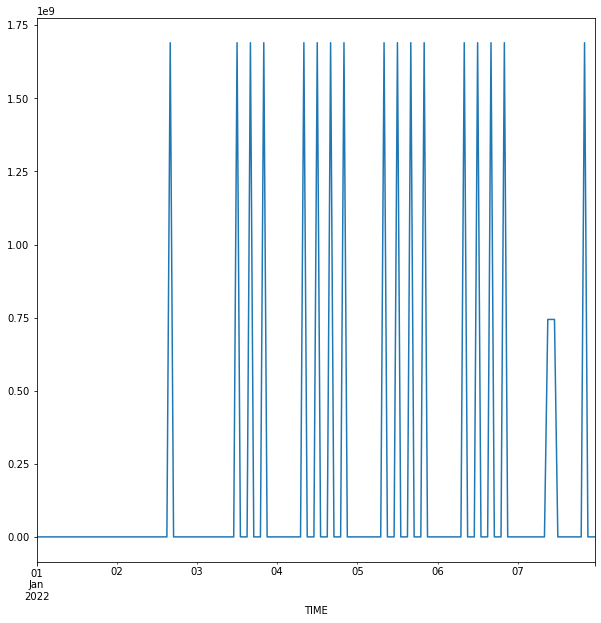

In [275]:
df_ent['125 ST'].plot(figsize=(10,10))

<AxesSubplot:xlabel='TIME'>

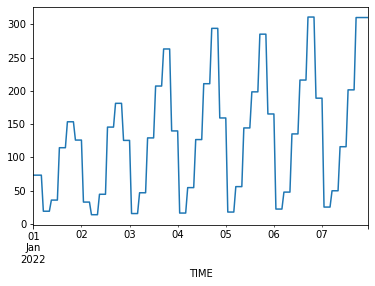

In [280]:
df_ent['ASTOR PL'].plot()

<AxesSubplot:xlabel='TIME'>

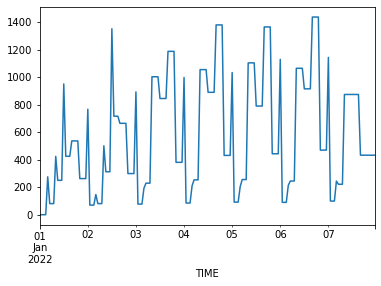

In [277]:
df2['125 ST'].plot()

<AxesSubplot:xlabel='TIME'>

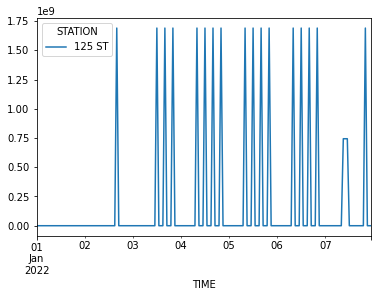

In [265]:
test = df_ent[['125 ST']].copy()
test.plot()

In [266]:
dbscan = DBSCAN(eps=70, min_samples=4)
dbscan.fit(test)
labels = dbscan.labels_
len([x for x in labels if x == -1])

30

In [267]:
outliers = np.argwhere(dbscan.labels_ == -1).flatten()
outliers

array([ 16,  20,  40,  44,  56,  60,  64,  68,  80,  84,  88,  92, 104,
       108, 112, 116, 128, 132, 136, 140, 152, 153, 154, 155, 156, 160,
       161, 162, 163, 164])

<AxesSubplot:xlabel='TIME'>

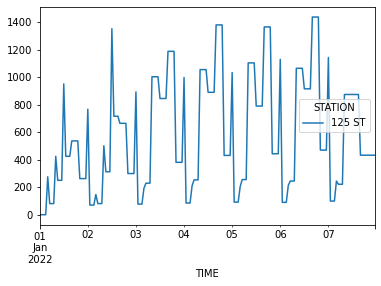

In [268]:
test.iloc[outliers,:] = np.nan
test = test.fillna(method='bfill').fillna(method='ffill')
test.plot()

In [143]:
t1 = test.copy()
t1['labels'] = [x for x in labels]

In [144]:
t1[t1['labels']==-1]

STATION,125 ST,labels
TIME,,
2022-01-02 16:00:00,1.690408e+09,-1
2022-01-03 08:00:00,1.983000e+03,-1
2022-01-04 08:00:00,1.690408e+09,-1
2022-01-04 12:00:00,1.690408e+09,-1
2022-01-05 08:00:00,1.690407e+09,-1
2022-01-05 12:00:00,1.690408e+09,-1
2022-01-05 16:00:00,1.690408e+09,-1
2022-01-05 20:00:00,1.690408e+09,-1
2022-01-06 08:00:00,1.690406e+09,-1


<AxesSubplot:xlabel='TIME'>

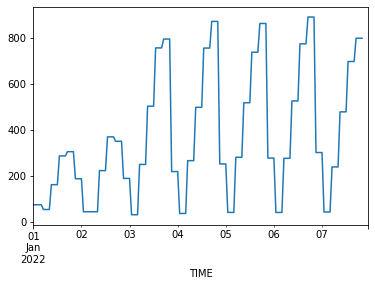

In [13]:
df_ent['7 AV'].plot()

<AxesSubplot:xlabel='TIME'>

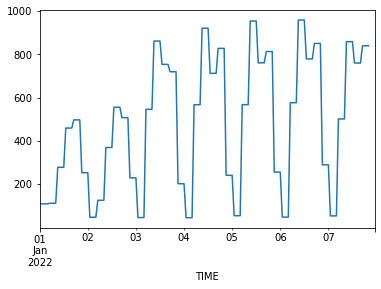

In [14]:
df_ex['7 AV'].plot()